In [98]:
import numpy as np
import itertools
import operator
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [2]:
# sample dataset taken from UCI repository
# classification problem with 4 continous predictor variable
# 1 target variable
f = open('data_banknote_authentication.txt')
data = f.read().split('\n')
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'data_banknote_authentication.txt'

In [3]:
x, y = [], []
for line in data:
    x.append(np.array([float(f) for f in line.strip().split(',')[:-1]]))
    y.append(np.array([int(f) for f in line.strip().split(',')[-1]]))

NameError: name 'data' is not defined

In [4]:
x[0], y[0]

IndexError: list index out of range

[[-0.2015173  -0.6833582 ]
 [ 0.37451947 -0.8280822 ]
 [-0.16189468 -1.2471066 ]
 ...
 [ 2.3255963   4.181329  ]
 [ 0.24707289  4.2294044 ]
 [ 1.7190224   4.8253503 ]] [0. 0. 0. ... 1. 1. 1.]


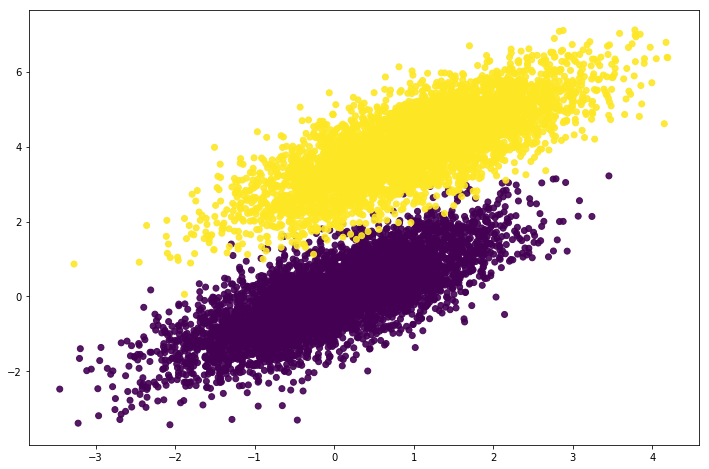

In [5]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0,0], [[1,.75],[.75,1]], num_observations)
x2 = np.random.multivariate_normal([1,4], [[1,.75],[.75,1]], num_observations)

simulated_features = np.vstack((x1,x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                             np.ones(num_observations)))

print(simulated_features, simulated_labels)

plt.figure(figsize = (12,8))
plt.scatter(simulated_features[:,0], simulated_features[:,1], c = simulated_labels,
           alpha = .9)

In [6]:
x = simulated_features
y = simulated_labels

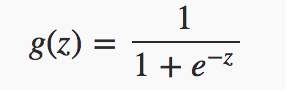

In [135]:
Image(filename='sigmoid.png')

In [8]:
def sigmoid(z):
    """defines a sigmoid function as in the equation above"""
    return 1.0 / (1.0 + np.exp(-z))

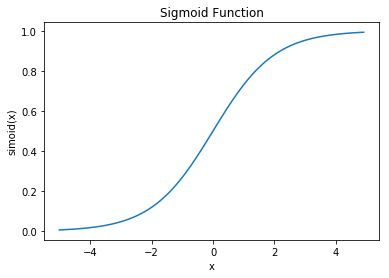

In [9]:
## plot a sample of how simoid function looks like
## all values between 0 and 1
nums = np.arange(-5, 5, step=0.1)

plt.plot(nums, sigmoid(nums))
plt.xlabel('x')
plt.ylabel('simoid(x)')
plt.title('Sigmoid Function')
plt.show()

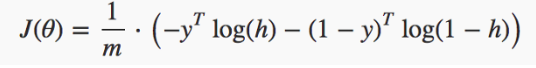

In [136]:
Image(filename='loss_function.png')

In [11]:
def cost(x, y, theta):
    """Function to return the cost function for a given x, y and theta"""
    error_sum = 0
    for i in range(len(y)):
        yi = predict(theta, x[i])
        error = (- y[i] * np.log(yi) - (1-y[i]) * np.log(1-yi))
        error_sum += error
    return error_sum*(1/len(y))

In [12]:
def predict(theta, x):
    """function to predict the probability or likelihood for a given theta and x"""
    return sigmoid(sum([x[i]*theta[i] for i in range(len(theta))]))

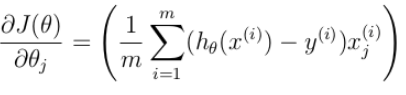

In [137]:
Image(filename='derivative.png')

In [14]:
def cost_derivative(x, y, theta, j):
    """Function to find the derivative of the cost function for the given x, y w.r.t one of the theta"""
    error_sum = 0
    for i in range(len(y)):
        error = (predict(theta, x[i]) - y[i]) * x[i][j]
        error_sum += error
    return (1/len(y) * error_sum)

In [15]:
def gd(x, y, theta):
    """Function to calculate the gradient descent for a given x y and theta"""
    new_theta = []
    for i in range(len(theta)):
        derivative = cost_derivative(x, y, theta, i)
        new_theta.append(theta[i] - derivative)
    return new_theta

In [16]:
theta = [0.0, 0.0] # initialize all theta to 0
num_iters = 1000 # number of iterations
for i in range(num_iters):
    new_theta = gd(x, y, theta) # for each iteration calculate the value of new theta
    theta = new_theta
    
print ('final values', theta, 'cost', cost(x, y, theta))

final values [-0.6830937676988835, 1.0464492969085164] cost 0.3936053947929542


In [21]:
232/7

33.142857142857146

In [21]:
def train_test_split(x, y, train_size=0.7):
    """Function to simulate train test split on line of sklearn (sklearn.model_selection.train_test_split)"""
    random_nums = np.random.rand(x.shape[0]) # generate random numbers
    split = random_nums < np.percentile(random_nums, train_size*100) #split the data

    x_train = x[split]
    y_train = y[split]
    x_test =  x[~split]
    y_test = y[~split]

    return x_train, x_test, y_train, y_test

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7) # use the function above to split

In [23]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape) # print the shape of the new train and test data

(7000, 2) (3000, 2) (7000,) (3000,)


In [26]:
print (np.unique(y_train, return_counts=True)) # check for the count of both classes in y_train
print (np.unique(y_test, return_counts=True)) # check for the count of both classes in y_test

(array([0., 1.]), array([3512, 3488]))
(array([0., 1.]), array([1488, 1512]))


In [27]:
theta = [0.0, 0.0] # initialize all theta to 0
num_iters = 1000 # number of iterations
for i in range(num_iters):
    new_theta = gd(x_train, y_train, theta) # for each iteration calculate the value of new theta
    theta = new_theta
    
print ('final values', theta, 'cost', cost(x, y, theta))

final values [-0.6528865236587085, 1.0389442624248244] cost 0.39364526205812567


In [139]:
## obtained theta values are small, that is a good indication that model is not overfitted
## addition on l1/l2 loss might help to further reduce the loss

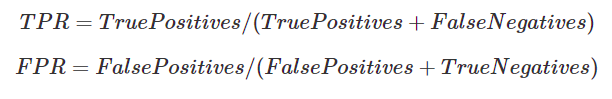

In [138]:
Image(filename='trp_fpr.png')

In [156]:
def metrics(y_true, y_pred):
    """Function to find the true positive, true negative, false positive, false negative
    based on y_true - actual target values
    y_pred = predicted target values based on a threshold"""
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i] == 1:
            true_positive +=1
        elif y_pred[i] == y_true[i] == 0:
            true_negative +=1
        elif y_pred[i] == 1 and y_true[i] == 0:
            false_positive +=1
        elif y_pred[i] == 0 and y_true[i] == 1:
            false_negative +=1
    return true_positive, true_negative, false_positive, false_negative

def roc_curve(y_true, preds):
    """Function to calculate the true positive rate, false positive rate"""
    fprs = []
    tprs = []
    threshold = []
    
    # iterate through thresholds from 0 to 1 and find the tpr, fpr
    ths = [i*1.0/100 for i in range(1, 101, 2)][::-1]
    
    for th in ths:
        threshold.append(th)
        y_pred_ = [y > th for y in preds]
        true_positive, true_negative, false_positive, false_negative = metrics(y_true, y_pred_)
        
        tpr = true_positive*1.0/ (true_positive + false_negative)
        fpr = false_positive*1.0/(false_positive + true_negative)
        
        fprs.append(fpr)
        tprs.append(tpr)
        
    return fprs, tprs, threshold  

def auc_fpr_tpr(fpr, tpr, trapezoid=False):
    """Function to calculate the area under curve from tpr and fpr"""
    inds = [i for (i, (s, e)) in enumerate(zip(fpr[: -1], fpr[1: ])) if s != e] + [len(fpr) - 1]
    fpr, tpr = fpr[inds], tpr[inds]
    area = 0
    ft = list(zip(fpr, tpr))
    for p0, p1 in zip(ft[: -1], ft[1: ]):
        area += (p1[0] - p0[0]) * ((p1[1] + p0[1]) / 2 if trapezoid else p0[1])
    return area

def confusion_matrix(y_true, preds):
    """Function to calculate the confusion matrix"""
    cm = [[0] * 2 for i in range(2)]
    for pred, true in zip(preds, y_true):
        cm[int(pred)][int(true)] += 1
    return cm

def accuracy(y_true, preds):
    """Function to calculate the accuracy for the predictions"""
    return sum([y_true[i]==preds[i] for i in range(len(y_true))])*100/len(y_true)

In [150]:
## for each of the datapoints in test data, calculate the predictions using the theta values
## obtained by training on train set
preds = []
for x_t in x_test:
    preds.append(round(predict(theta, x_t), 4))
assert len(preds) == len(x_test)
print ('first 5 probabilities predicted:: ', preds[0:5])

first 5 probabilities predicted::  [0.2333, 0.2455, 0.4755, 0.521, 0.5417]


In [151]:
## for multiple thresholds find the precision, recall, f1
for th in range(5, 100, 10):
    y_pred = [y>th*1.0/100 for y in preds]
    true_positive, true_negative, false_positive, false_negative = metrics(y_test, y_pred)
    #print (true_positive, true_negative, false_positive, false_negative)
    precision = true_positive*1.0/(true_positive + false_positive)
    recall = true_positive*1.0 / (true_positive + false_negative)
    print ('Threshold {}, Recall {}, Precision P {}, F1 {}'.format(th/100., round(recall,4), round(precision,4), round(2*precision*recall/(precision+recall), 4)))

Threshold 0.05, Recall 1.0, Precision P 0.504, F1 0.6702
Threshold 0.15, Recall 1.0, Precision P 0.5059, F1 0.6719
Threshold 0.25, Recall 1.0, Precision P 0.5196, F1 0.6839
Threshold 0.35, Recall 1.0, Precision P 0.5516, F1 0.711
Threshold 0.45, Recall 1.0, Precision P 0.6232, F1 0.7679
Threshold 0.55, Recall 1.0, Precision P 0.7241, F1 0.84
Threshold 0.65, Recall 1.0, Precision P 0.8414, F1 0.9139
Threshold 0.75, Recall 1.0, Precision P 0.948, F1 0.9733
Threshold 0.85, Recall 0.9954, Precision P 0.9954, F1 0.9954
Threshold 0.95, Recall 0.7963, Precision P 1.0, F1 0.8866


In [158]:
## for the best threshold that maximized F1, get the confusion matrix and accuracy
y_pred = [y>0.85 for y in preds]
print ('accuracy::', round(accuracy(y_test, y_pred), 2))

accuracy:: 99.53


In [164]:
print('confusion matrix')
print (confusion_matrix(list(y_test), list(y_pred)))
## there are 7 cases where 7 0 have been classified as 1 (FP) and 7 1 have been classified as 0 (FN)
## 1481 out of 1488 0 have been classifid correctly and 1505 out of 1512 1 have been classified correctly

confusion matrix
[[1481, 7], [7, 1505]]


In [152]:
## F1, Recall, Precision are best for threshold = 0.85

In [153]:
## calculate the auc using the fpr, tpr, and then use fpr, tpr to get auc
fpr_d, tpr_d, thrshold = roc_curve(y_test, preds)
roc_auc = auc_fpr_tpr(np.array(fpr_d), np.array(tpr_d))
print ('auc value =', round(roc_auc, 4))

auc value = 0.9998


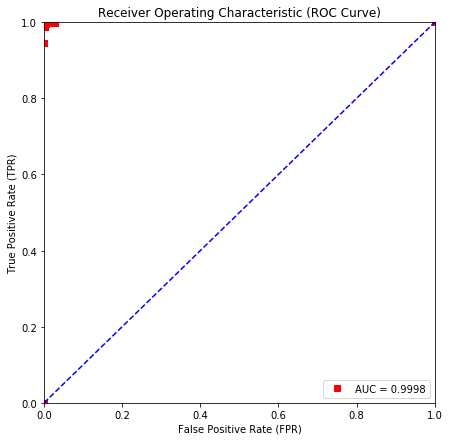

In [154]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.plot(fpr, tpr, 'rs', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

In [155]:
## overall the solution above performs really good with really high f1, recall, precision, auc scores
## this is majorly because the data quality is good as it came from a multivariate normal distribution
## even in the plot show before, it can be easily seen that the points are clearly separated and a linear
## boundary will do a good job separating the points